# Simulation in 2D mesh

# Project: Fractured medium

# Core Sample: Indiana ILB-4-15

# Author: Monique Dali @mfdali

# Company: @lmmp

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [5]:
#Change to the google drive directory
if "src" in os.getcwd():
    os.chdir('..')

In [6]:
os.getcwd()

'/home/monique/copy-fracture-2D'

## Mesh Test

In [7]:
# File with mesh test information
folder = "data/"  #Map where the file is
filename = "stokes-ss-hvar-ILB_4_15.txt"

In [8]:
#Load data

# Read file
df = pd.read_csv(folder+filename,header=0,sep=',')

In [9]:
# Label the simulated scenarios
df['label'] = df['Case'].str[24:27]

In [10]:
# Ascending order of degrees of freedom
df.sort_values(by=['dof'],inplace=True)

In [11]:
# Visualize dataframe
df.head()

,Case,Equation,Av_Height,np.min,np.max,Inflow,Outflow,%Deviation,K_eq,Exec_time,Area,Height_3,Av_lub,cells,dof,time,label
0,stokes-ss-hvar-ILB_4_15_2e3-0,stokes-ss-hvar-ILB_4_151e4-0,0.000180,1.000000e-05,0.00217,0.000065,0.000065,-1.693335e-11,2.490240e-09,4.44995,0.00327,0.000000e+00,0.000000e+00,1598.0,7514.0,4.44995,2e3
1,stokes-ss-hvar-ILB_4_15_1e3-0,stokes-ss-hvar-ILB_4_155e5-0,0.000179,1.000000e-15,0.00217,0.000066,0.000066,-3.129552e-11,2.523100e-09,7.70486,0.00327,7.759740e+08,1.615180e-04,6510.0,29938.0,7.70486,1e3
2,stokes-ss-hvar-ILB_4_15_4e4-0,stokes-ss-hvar-ILB_4_152e5-0,0.000179,1.000000e-15,0.00217,0.000064,0.000064,-1.468975e-10,2.434360e-09,34.99750,0.00327,2.101320e+15,1.158790e-06,42364.0,192276.0,34.99750,4e4
3,stokes-ss-hvar-ILB_4_15_1e4-0,stokes-ss-hvar-ILB_4_151e4-0,0.000180,1.000000e-15,0.00217,0.000061,0.000061,-8.002092e-10,2.322580e-09,600.38400,0.00327,1.114650e+22,6.644420e-09,653800.0,2948520.0,600.38400,1e4
4,stokes-ss-hvar-ILB_4_15_5e5-0,stokes-ss-hvar-ILB_4_155e5-0,0.000179,1.000000e-15,0.00217,0.000059,0.000059,-1.246528e-09,2.259270e-09,3475.27000,0.00327,9.126950e+37,3.296560e-14,2615200.0,11781200.0,3475.27000,5e5


<Figure size 640x480 with 0 Axes>

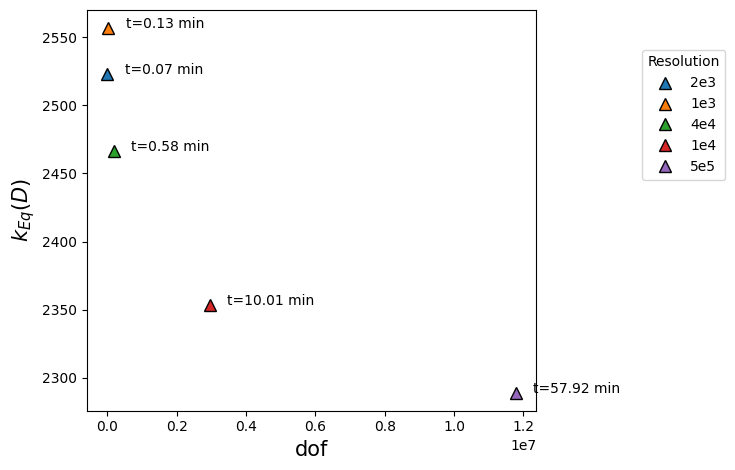

In [12]:
#Plot mesh test
plt.figure(tight_layout=True)
fig, ax = plt.subplots()

#Plot numerical calculations x dofs
for i in range(0,len(df)):
  ax.plot(df['dof'][i],df['K_eq'][i]*1013250000000, '^', markersize=8,color='k', markerfacecolor='C'+str(i),label = df['label'][i])
  plt.text(df['dof'][i]+500000,df['K_eq'][i]*1013250000000,"t="+str(round(df['time'][i]/60,2))+" min",horizontalalignment='left')#, verticalalignment='top')

# Set axis limits
ax.set_ylabel('$k_{Eq} (D)$', fontsize = 15)
ax.set_xlabel('dof', fontsize = 15)

# Set legend
fig.legend(loc=2,ncol=1,title='Resolution',bbox_to_anchor = (1.00, 0.9))

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.show()

#Save graph if necessary
#plt.savefig("mesh_test_ILB_4_15.png")

##Change Aperture

The original aperture extracted from STL files are manipulated to create fractures with more resistance to flow

In [13]:
# File with simulation information
filename_variation = "stokes-ss-hvar-ILB_4_15_hvar.txt"

In [14]:
#Load data

# Read file
hvar_df = pd.read_csv(folder+filename_variation,header=0,sep=',')

In [15]:
# Convert permeability from m² to Darcy
hvar_df['K_eq_darcy'] = hvar_df['K_eq']/1e-12

In [16]:
# Filter simulations with low deviation between inflow and outflow
hvar_selection = hvar_df[abs(hvar_df['%Deviation'])<1e-5]

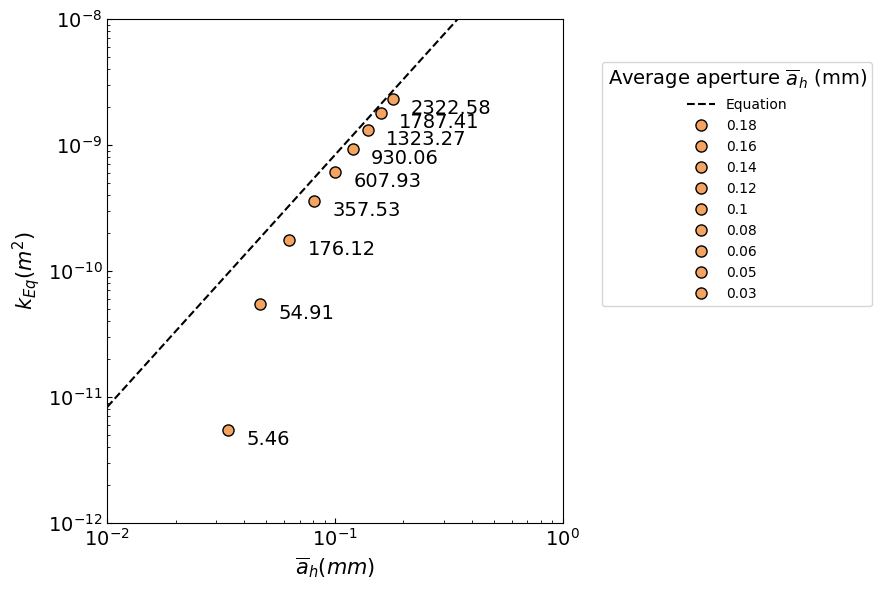

In [17]:
#Plot

fig, ax = plt.subplots(figsize=(6, 6))

#Create x array
x = np.arange(0,1.25E-3,1E-7)
#plot cubic law equation
ax.plot(x*1000,(x**2)/12, '--', color='k', label = 'Equation')

#Plot average aperture x computed permeability
for i in range(len(hvar_selection)):
  ax.plot(hvar_selection['Av_Height'][i]*1000, hvar_selection['K_eq'][i], 'o', markersize=8, color='k', markerfacecolor='sandybrown',label = str(round(hvar_selection['Av_Height'][i]*1000,2)))
  plt.text((hvar_selection['Av_Height'][i]*1000)*1.2, hvar_selection['K_eq'][i],str(round(hvar_selection['K_eq'][i]/1E-12,2)),horizontalalignment='left', verticalalignment='top')

# Set label axis
ax.set_ylabel('$k_{Eq} (m^2)$', fontsize = 15)
ax.set_xlabel('$\overline{a}_h (mm)}$', fontsize = 15)

# Set axis limits
ax.set_xlim([0.01,1])
ax.set_ylim([1E-12,1E-8])

#Change log-log scale
plt.yscale("log")
plt.xscale("log")

# Add legend
fig.legend(loc=2,ncol=1,title='Average aperture $\overline{a}_h$ (mm)',bbox_to_anchor = (1.00, 0.9))

# Set style
plt.style.use('default')
fig.patch.set_facecolor('xkcd:white')
fig.tight_layout()
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.show()

# Save graph if necessary
#plt.savefig("ILB-4-15.png")

In [18]:
# Show selected columns of the table
hvar_selection[['Case','Av_Height','np.min','np.max','K_eq_darcy']]

,Case,Av_Height,np.min,np.max,K_eq_darcy
0,stokes-ss-hvar-ILB_4_151e4-0,0.000180,1.000000e-15,0.00217,2322.58000
1,stokes-ss-hvar-ILB_4_151e4-1,0.000160,1.000000e-15,0.00215,1787.41000
2,stokes-ss-hvar-ILB_4_151e4-2,0.000140,1.000000e-15,0.00213,1323.27000
3,stokes-ss-hvar-ILB_4_151e4-3,0.000120,1.000000e-15,0.00211,930.05700
4,stokes-ss-hvar-ILB_4_151e4-4,0.000100,1.000000e-15,0.00209,607.93200
5,stokes-ss-hvar-ILB_4_151e4-5,0.000081,1.000000e-15,0.00207,357.53400
6,stokes-ss-hvar-ILB_4_151e4-6,0.000063,1.000000e-15,0.00205,176.12200
7,stokes-ss-hvar-ILB_4_151e4-7,0.000047,1.000000e-15,0.00203,54.91090
8,stokes-ss-hvar-ILB_4_151e4-8,0.000034,1.000000e-15,0.00201,5.46442
